<a href="https://colab.research.google.com/github/SANJEEVKUMARBG/Deep_Learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing libraries

In [131]:
import tensorflow as tf
import os

In [132]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [133]:
len(gpus)

1

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns

Removing dodgy images

In [135]:
import cv2
import imghdr

In [136]:
data = '/content/drive/MyDrive/data'

In [137]:
image_exts = ['jpeg','jpg','bmp','png']

In [138]:
image_exts[0]

'jpeg'

In [139]:
#to see what all folders we have in the main folder
os.listdir(data)

['sad', 'happy', 'logs', 'hap.jpg', 'ss.jpg', 'moody.jpg']

In [140]:
#to see the data in happy folder
os.listdir(os.path.join(data,'happy'))

['image29.jpeg',
 'image23.jpeg',
 'image15.jpeg',
 'image22.jpeg',
 'image16.jpeg',
 'image17.jpeg',
 '71hBPTAhIXL.jpg',
 'happyball-3.jpg',
 'WorldHappinessReport_620.jpg',
 'happy-person-arms-raised-outstretched-69762123.jpg',
 'what-makes-people-happy1.jpg',
 '1920px-face-smile.svg_.png.jpg',
 'images16.jpg',
 'happy-indians_5f66fd46d9f5b.jpg',
 'how-happy-are-healthy-people.jpg',
 'Successful-year.jpg',
 'what-makes-people-happy.jpeg',
 'happy-people.jpg',
 'Travis-Bradberry-Happy.jpg',
 '05-12-21-happy-people.jpg',
 'images21.jpg',
 'A_Sep20_14_1189155141.jpg',
 'shutterstock_1123160147.jpg',
 'compassion-900x387.jpg',
 'habits-of-happy-people-cr3.jpg',
 'happy-people-vector-839522.jpg',
 'tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg',
 'maxresdefault2.jpg',
 'png-clipart-happiness-graphy-smile-happy-people-love-photography.png',
 '170404-happy-workers-feature.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Befo

In [143]:
#looping through all the images in the sub directory

for image_class in os.listdir(data):
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try:
            img = cv2.imread(image_path) #allows to open the image 
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            #os.remove(image_path)

Load Data

In [144]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 167 files belonging to 2 classes.


In [146]:
data_interetor = data.as_numpy_iterator()

In [147]:
data_interetor

In [148]:
batch = data_interetor.next()

In [149]:
len(batch)   #2 parts to the dataset, Images and labels

2

In [150]:
#image represented as numpy array
batch[0].shape

(32, 256, 256, 3)

In [151]:
#class 1 = Sad
#class 0 = Happy
batch[1]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

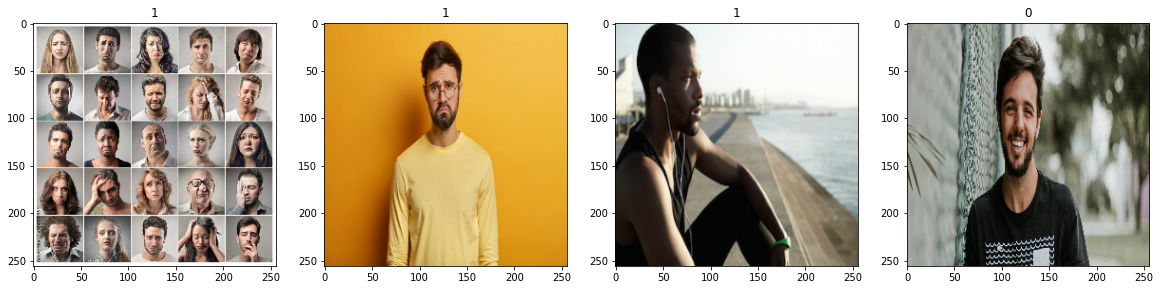

In [152]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess Data

In [153]:
batch[0].max()

255.0

In [154]:
scaled = batch[0] / 255

In [155]:
scaled.max()

1.0

In [156]:
data = data.map(lambda x,y:(x/255,y))

In [157]:
scaled_iterator = data.as_numpy_iterator()

In [158]:
batch = scaled_iterator.next()

In [159]:
batch[0].max()

1.0

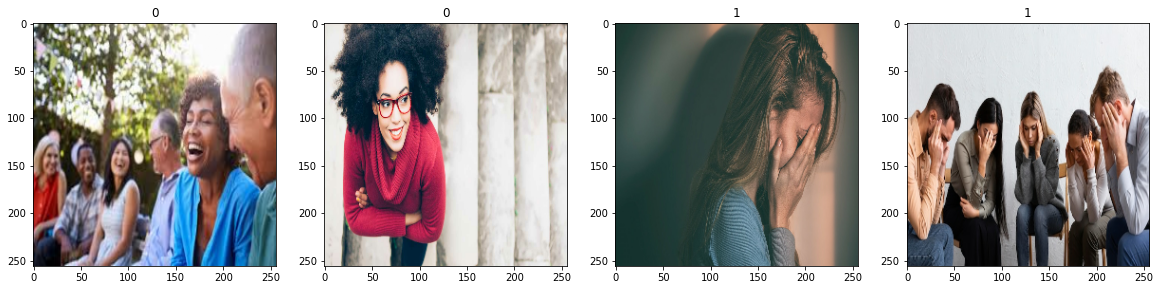

In [160]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

Train test split

In [214]:
train_size = int(len(data)*0.6)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.2)+1

In [215]:
len(data)

6

In [216]:
train_size+val_size+test_size

6

In [217]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Bulding the DL model

In [218]:
# import some dependencies

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [219]:
model = Sequential()

In [220]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [221]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [222]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [223]:
logdir = '/content/drive/MyDrive/data/logs'

In [224]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [225]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 1.3059 - accuracy: 0.4062 - val_loss: 1.0323 - val_accuracy: 0.4062
Epoch 2/20
3/3 [==============================] - 5s 1s/step - loss: 0.8835 - accuracy: 0.4479 - val_loss: 0.6314 - val_accuracy: 0.8125
Epoch 3/20
3/3 [==============================] - 5s 1s/step - loss: 0.6498 - accuracy: 0.5938 - val_loss: 0.5687 - val_accuracy: 0.5938
Epoch 4/20
3/3 [==============================] - 5s 1s/step - loss: 0.6711 - accuracy: 0.5521 - val_loss: 0.6521 - val_accuracy: 0.6562
Epoch 5/20
3/3 [==============================] - 5s 1s/step - loss: 0.6190 - accuracy: 0.7604 - val_loss: 0.6162 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 5s 1s/step - loss: 0.5759 - accuracy: 0.7500 - val_loss: 0.4562 - val_accuracy: 0.7812
Epoch 7/20
3/3 [==============================] - 5s 1s/step - loss: 0.5541 - accuracy: 0.6354 - val_loss: 0.5241 - val_accuracy: 0.7188
Epoch 8/20
3/3 [=========================

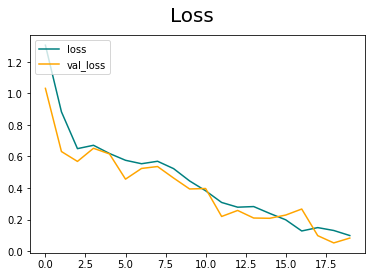

In [226]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

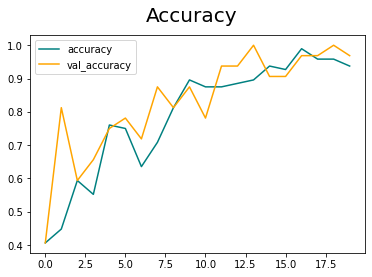

In [227]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate performance

In [228]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [229]:
pre = Precision()
re = Recall()
acc  = BinaryAccuracy()

In [230]:

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y,yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 71ms/step


In [231]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [238]:
import cv2

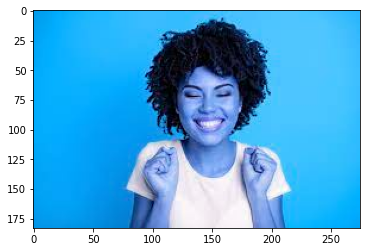

In [262]:
img = cv2.imread('/content/drive/MyDrive/data/happ.jpg')
plt.imshow(img)
plt.show()

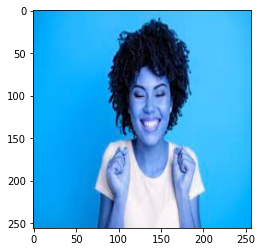

In [263]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [264]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 19ms/step


In [265]:
yhat

array([[0.0761412]], dtype=float32)

In [266]:
if yhat > 0.5: 
    print(f'Fellow is Sad')
else:
    print(f'Fellow is Happy')

Fellow is Happy


Save the model

In [267]:
from tensorflow.keras.models import load_model

In [268]:
model.save(os.path.join('models','sentiment.h5'))

In [269]:
os.path.join('models','sentiment.h5')

'models/sentiment.h5'

In [271]:
new_model = load_model(os.path.join('models','sentiment.h5'))

In [273]:
yhat_new = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 112ms/step


array([[0.0761412]], dtype=float32)

In [274]:
if yhat > 0.5: 
    print(f'Fellow is Sad')
else:
    print(f'Fellow is Happy')

Fellow is Happy
